Training finished.


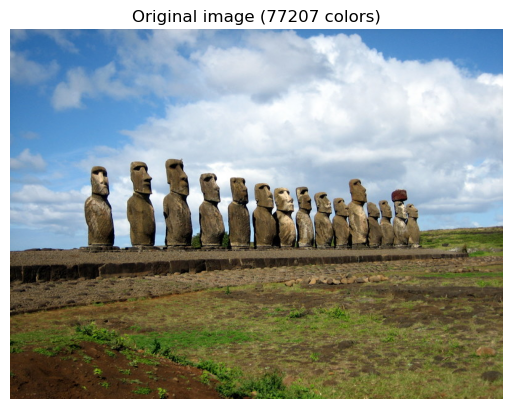

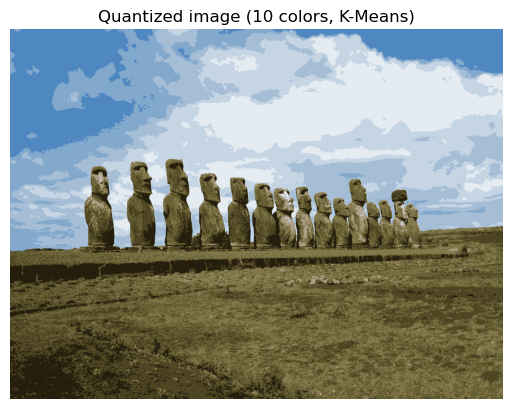

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle

image_file = "moai.jpg"
img = cv2.imread(image_file)
# Note that ``imread`` in cv2 is by default in the BGR format.
# We will want it in RGB format for visualization with matplotlib.  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img, dtype=np.float64) / 255
w, h, d = img.shape
img_reshaped = img.reshape((w * h, d))

# get the original number of colors.  
orinal_number_colors = len(np.unique(img_reshaped, axis=0))

n_colors = 10
image_array_sample = shuffle(img_reshaped, random_state=0, n_samples=1_000)

from KMeans import KMeans

# Code to do this with sklearn k-means implementation.
#kmeans = KMeans(n_clusters=n_colors, 
#                init='k-means++',
#                n_init=10,
#                random_state=0).fit(image_array_sample)
#labels = kmeans.predict(img_reshaped)
#img_quantized = kmeans.cluster_centers_[labels]
#img_quantized = img_quantized.reshape(w,h,-1)

kmeans = KMeans(n_clusters=n_colors, 
                init='random',
                random_state=0).fit(image_array_sample)

print("Training finished.")

labels = np.array(kmeans.predict(img_reshaped), dtype=int)
img_quantized = kmeans.cluster_centers_.iloc[labels]
img_quantized = np.array(img_quantized)
img_quantized = img_quantized.reshape(w,h,-1)

# Original image.  
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f'Original image ({orinal_number_colors} colors)')
plt.imshow(img)

# Image quantized using k-means.
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(img_quantized)

